In [ ]:
import os 
import numpy as np 
import pandas as pd 
import skimage
import imageio
import scipy
import matplotlib.pyplot as plt
from PIL import Image
import statistics
from scipy.stats import kurtosis

In [ ]:
def PATH(IMG_path):
  img_name=[]
  for file_name in IMG_path: 
     img_name.append(file_name)
     img_name.sort()
     #file_name_jpg_arr = np.asarray(file_name_jpg)
  return img_name

In [ ]:
def vectRGB (path,Img):
  Img = imageio.imread(path+'/'+Img)
  
  r,g,b = Img[:,:,0], Img[:,:,1], Img[:,:,2]

  x = Img.shape[0]
  y = Img.shape[1]
  Vr=[]
  Vb=[]
  Vg=[]

  for i in range(x-1):
    for j in range(y-1):
      Vr.append(r[i,j])

  for i in range(x-1):
    for j in range(y-1):
      Vg.append(g[i,j])  

  for i in range(x-1):
    for j in range(y-1):
      Vb.append(b[i,j]) 
  
  vRGB = np.hstack((Vr,Vg,Vb))
  VIMG = np.concatenate((Vr, Vg, Vb))

  VectorR = np.zeros(256)
  VectorG = np.zeros(256)
  VectorB = np.zeros(256)

  frecuenciaR = {}
  frecuenciaG = {}
  frecuenciaB = {}

  for n in Vr:
    if n in frecuenciaR:
      frecuenciaR[n] += 1
    else:
      frecuenciaR[n] = 1

  for n in Vg:
    if n in frecuenciaG:
      frecuenciaG[n] += 1
    else:
      frecuenciaG[n] = 1
  
  for n in Vb:
    if n in frecuenciaB:
      frecuenciaB[n] += 1
    else:
      frecuenciaB[n] = 1


  for valorR in sorted(frecuenciaR):
    VectorR[valorR] = frecuenciaR[valorR]

  for valorG in sorted(frecuenciaG):
    VectorG[valorG] = frecuenciaG[valorG]

  for valorB in sorted(frecuenciaB):
    VectorB[valorB] = frecuenciaB[valorB]

  totalvect = np.concatenate((VectorR, VectorG, VectorB))

  Rr = VectorR.tolist() 
  Gg = VectorG.tolist()
  Bb = VectorB.tolist()

  totallist = Rr+Gg+Bb


  #return totalvect, frecuenciaR, VectorR, VectorG, VectorB
  return totallist 

In [ ]:
#este es el bueno, es igual al anterior (que voy aborrar)
#y cuando lo borre, borrare el comentario, la unica diferencia 
#es que solamente voy a estar regresando un valor, para no agarrar poder computacional de más 
def vectRGB_S (path,Img):
  Img = imageio.imread(path+'/'+Img)
  
  r,g,b = Img[:,:,0], Img[:,:,1], Img[:,:,2]

  x = Img.shape[0]
  y = Img.shape[1]
  Vr=[]
  Vb=[]
  Vg=[]

  for i in range(x-1):
    for j in range(y-1):
      Vr.append(r[i,j])

  for i in range(x-1):
    for j in range(y-1):
      Vg.append(g[i,j])  

  for i in range(x-1):
    for j in range(y-1):
      Vb.append(b[i,j]) 
  
  vRGB = np.hstack((Vr,Vg,Vb))
  VIMG = np.concatenate((Vr, Vg, Vb))

  VectorR = np.zeros(256)
  VectorG = np.zeros(256)
  VectorB = np.zeros(256)

  frecuenciaR = {}
  frecuenciaG = {}
  frecuenciaB = {}

  for n in Vr:
    if n in frecuenciaR:
      frecuenciaR[n] += 1
    else:
      frecuenciaR[n] = 1

  for n in Vg:
    if n in frecuenciaG:
      frecuenciaG[n] += 1
    else:
      frecuenciaG[n] = 1
  
  for n in Vb:
    if n in frecuenciaB:
      frecuenciaB[n] += 1
    else:
      frecuenciaB[n] = 1


  for valorR in sorted(frecuenciaR):
    VectorR[valorR] = frecuenciaR[valorR]

  for valorG in sorted(frecuenciaG):
    VectorG[valorG] = frecuenciaG[valorG]

  for valorB in sorted(frecuenciaB):
    VectorB[valorB] = frecuenciaB[valorB]

  totalvect = np.concatenate((VectorR, VectorG, VectorB))

  Rr = VectorR.tolist() 
  Gg = VectorG.tolist()
  Bb = VectorB.tolist()

  totallist = Rr+Gg+Bb


  #return totalvect, frecuenciaR, VectorR, VectorG, VectorB
  return Vr, Vg, Vb

In [ ]:
main_path = '/content/drive/MyDrive/jonathan_patch/'
path_sec = main_path + 'SEC/'
path_sur = main_path + 'SUR/'

In [ ]:
path_sec_list = os.listdir(path_sec)
path_sur_list = os.listdir(path_sur)

In [ ]:
only_subtype = 'SEC-Subtype_Va'
path_sub_sec_type = path_sec + only_subtype
path_sub_sec_type_list =os.listdir(path_sub_sec_type)
path_sub_sec_type_1 =  path_sub_sec_type + '_1'
path_sub_sec_type_list_1 = os.listdir(path_sub_sec_type_1)

In [ ]:
name = only_subtype

###HISTOGRAMA

In [ ]:
Nombre=[]
Value = []

for i in range(len(PATH(path_sub_sec_type_list))):
  Nombre.append(PATH(path_sub_sec_type_list)[i])
for i in range(len(PATH(path_sub_sec_type_list))):
  Value.append(vectRGB(path_sub_sec_type,PATH(path_sub_sec_type_list)[i]))


for i in range(len(PATH(path_sub_sec_type_list_1))):
  Nombre.append(PATH(path_sub_sec_type_list_1)[i])
for i in range(len(PATH(path_sub_sec_type_list_1))):
  Value.append(vectRGB(path_sub_sec_type_1,PATH(path_sub_sec_type_list_1)[i]))

In [ ]:
df_fi = pd.DataFrame()

In [ ]:

for i in range(len(Value)):
  df_fi[i] = Value[i]

df_fin = pd.DataFrame()
df_fin= df_fi.transpose()

<ipython-input-110-eeea26b8a4ab>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fi[i] = Value[i]


In [ ]:
df_fin.insert(0, "Nombre", Nombre, allow_duplicates=False)

In [ ]:
df_fin.to_csv(only_subtype+'.csv')

In [ ]:
df_fin

,Nombre,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,10538 - surface 1-1.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.0,12.0,17.0,25.0,21.0,13.0,16.0,8.0,5.0,34.0
1,10538 - surface 1-10.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,16.0,18.0,27.0,22.0,17.0,19.0,12.0,7.0,39.0
2,10538 - surface 1-11.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,16.0,18.0,27.0,22.0,17.0,19.0,12.0,7.0,39.0
3,10538 - surface 1-12.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,16.0,18.0,27.0,22.0,17.0,19.0,12.0,7.0,39.0
4,10538 - surface 1-13.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,16.0,18.0,27.0,22.0,17.0,19.0,12.0,7.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4066 - surface 4-5.png,3.0,1.0,2.0,3.0,5.0,5.0,8.0,14.0,44.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,4066 - surface 4-6.png,3.0,1.0,1.0,3.0,5.0,4.0,1.0,0.0,0.0,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,4066 - surface 4-7.png,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,...,5.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
998,4066 - surface 4-8.png,0.0,2.0,2.0,2.0,3.0,6.0,4.0,8.0,17.0,...,7.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


###STATS

In [ ]:
VR_M = []
VG_M = []
VB_M = []

VR_std = []
VG_std = []
VB_std = []

VR_var = []
VG_var = []
VB_var = []

VR_kur = []
VG_kur = []
VB_kur = []


VR_1 = []
VG_1 = []
VB_1 = []

for i in range(len(PATH(path_sub_sec_type_list))):
  VR_, VG_, VB_ = vectRGB_S (path_sub_sec_type,PATH(path_sub_sec_type_list)[i])
  
  VR_1.append(VR_)
  VG_1.append(VG_)
  VB_1.append(VB_)

for i in range(len(PATH(path_sub_sec_type_list_1))):
  VR_, VG_, VB_ = vectRGB_S (path_sub_sec_type_1,PATH(path_sub_sec_type_list_1)[i])
  
  VR_1.append(VR_)
  VG_1.append(VG_)
  VB_1.append(VB_) 


In [ ]:
len(VR_1)

1000

In [ ]:
VR_1_T = []
VG_1_T = []
VB_1_T = []

for i in range(len(VR_1)):
  for j in range(len(VR_1[i])):
    VR_1_T.append(VR_1[i][j])

for i in range(len(VG_1)):
  for j in range(len(VG_1[i])):
    VG_1_T.append(VG_1[i][j])

for i in range(len(VB_1)):
  for j in range(len(VB_1[i])):
    VB_1_T.append(VB_1[i][j])


VR_1_T = np.asarray(VR_1_T)
VG_1_T = np.asarray(VG_1_T)
VB_1_T = np.asarray(VB_1_T)

R_mean = VR_1_T.mean()
G_mean = VG_1_T.mean()
B_mean = VB_1_T.mean()

R_std = VR_1_T.std()
G_std = VG_1_T.std()
B_std = VB_1_T.std()

R_var = VR_1_T.var()
G_var = VG_1_T.var()
B_var = VB_1_T.var()

R_kur = kurtosis(VR_1_T)
G_kur = kurtosis(VG_1_T)
B_kur = kurtosis(VB_1_T)

In [ ]:
#df_1 = pd.DataFrame([R_mean,G_mean,B_mean,R_std,G_std,B_std,R_var,G_var,B_var,R_kur,G_kur,B_kur], columns = [name], index= ['R_mean','G_mean','B_mean','R_std','G_std','B_std',
#                                                                                        'R_var','G_var','B_var','R_kur','G_kur','B_kur'])

In [ ]:
stats= []
stats = [R_mean,G_mean,B_mean,R_std,G_std,B_std,R_var,G_var,B_var,R_kur,G_kur,B_kur]
stats = np.asarray(stats)

In [ ]:
df_1[name] = stats

In [ ]:
df_1

,SUR-Subtype_IIIa,SUR-Subtype_IIa,SUR-Subtype_IVc,SUR-Subtype_IVd,SUR-Subtype_Ia,SUR-Subtype_Va
R_mean,172.720654,175.227195,173.140438,178.356957,143.907122,183.536920
G_mean,151.455125,136.285393,163.856455,169.056096,131.266841,162.612988
B_mean,126.931984,111.927927,141.440504,148.943391,115.273058,147.993792
R_std,53.775302,53.581219,50.563656,45.372960,51.964467,51.001305
G_std,51.816514,53.901729,48.674319,43.054749,48.931293,53.313065
B_std,53.358753,54.962429,46.679728,40.053266,47.132503,57.377540
R_var,2891.783107,2870.947003,2556.683331,2058.705516,2700.305792,2601.133062
G_var,2684.951152,2905.396344,2369.189287,1853.711453,2394.271469,2842.282939
B_var,2847.156502,3020.868615,2178.997030,1604.264101,2221.472884,3292.182126
R_kur,0.187462,1.285094,0.141521,1.119641,-0.300401,0.893997


In [ ]:
df_1 = df_1.transpose()

###Boxplots

In [ ]:
VR_1 = []
VG_1 = []
VB_1 = []

for i in range(len(PATH(path_sub_sec_type_list))):
  VR_, VG_, VB_ = vectRGB_S (path_sub_sec_type,PATH(path_sub_sec_type_list)[i])
  
  VR_1.append(VR_)
  VG_1.append(VG_)
  VB_1.append(VB_)

for i in range(len(PATH(path_sub_sec_type_list_1))):
  VR_, VG_, VB_ = vectRGB_S (path_sub_sec_type_1,PATH(path_sub_sec_type_list_1)[i])
  
  VR_1.append(VR_)
  VG_1.append(VG_)
  VB_1.append(VB_) 

VR_1_T = []
VG_1_T = []
VB_1_T = []

for i in range(len(VR_1)):
  for j in range(len(VR_1[i])):
    VR_1_T.append(VR_1[i][j])

for i in range(len(VG_1)):
  for j in range(len(VG_1[i])):
    VG_1_T.append(VG_1[i][j])

for i in range(len(VB_1)):
  for j in range(len(VB_1[i])):
    VB_1_T.append(VB_1[i][j])


VR_1_T = np.asarray(VR_1_T)
VG_1_T = np.asarray(VG_1_T)
VB_1_T = np.asarray(VB_1_T)

In [ ]:
VR_1_T_SUR_IIIa = VR_1_T 
VG_1_T_SUR_IIIa = VG_1_T 
VB_1_T_SUR_IIIa = VB_1_T 

In [ ]:
VR_1_T_SUR_IIa = VR_1_T 
VG_1_T_SUR_IIa = VG_1_T 
VB_1_T_SUR_IIa = VR_1_T 

In [ ]:
VR_1_T_SUR_IVc = VR_1_T 
VG_1_T_SUR_IVc = VG_1_T
VB_1_T_SUR_IVc = VB_1_T

In [ ]:
VR_1_T_SUR_IVd = VR_1_T
VG_1_T_SUR_IVd = VG_1_T
VB_1_T_SUR_IVd = VB_1_T

In [ ]:
VR_1_T_SUR_Ia = VR_1_T
VG_1_T_SUR_Ia = VG_1_T
VB_1_T_SUR_Ia = VB_1_T

In [ ]:
VR_1_T_SUR_Va = VR_1_T
VG_1_T_SUR_Va = VG_1_T
VB_1_T_SUR_Va = VB_1_T

In [ ]:
VR_1_T_SEC_IIIa = VR_1_T 
VG_1_T_SEC_IIIa = VG_1_T 
VB_1_T_SEC_IIIa = VB_1_T  

In [ ]:
VR_1_T_SEC_IIa = VR_1_T 
VG_1_T_SEC_IIa = VG_1_T 
VB_1_T_SEC_IIa = VR_1_T

In [ ]:
VR_1_T_SEC_IVc = VR_1_T 
VG_1_T_SEC_IVc = VG_1_T
VB_1_T_SEC_IVc = VB_1_T

In [ ]:
VR_1_T_SEC_IVd = VR_1_T
VG_1_T_SEC_IVd = VG_1_T
VB_1_T_SEC_IVd = VB_1_T

In [ ]:
VR_1_T_SEC_Ia = VR_1_T
VG_1_T_SEC_Ia = VG_1_T
VB_1_T_SEC_Ia = VB_1_T

In [ ]:
VR_1_T_SEC_Va = VR_1_T
VG_1_T_SEC_Va = VG_1_T
VB_1_T_SEC_Va = VB_1_T

{'whiskers': [<matplotlib.lines.Line2D at 0x7f34f46c9a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f34f46d6160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f34f46c9700>,
 'medians': [<matplotlib.lines.Line2D at 0x7f34f46d6820>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f34f46d6b20>,
 'means': []}

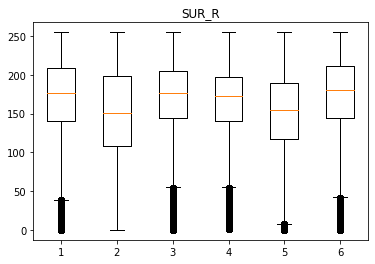

In [ ]:
#plt.boxplot([VR_1_T_SUR_IIIa,VR_1_T_SUR_IIa,VR_1_T_SUR_IVc,VR_1_T_SUR_IVd,VR_1_T_SUR_Ia,VR_1_T_SUR_Va])
data_sur_r =  [VR_1_T_SUR_IIIa,VR_1_T_SUR_IIa,VR_1_T_SUR_IVc,VR_1_T_SUR_IVd,VR_1_T_SUR_Ia,VR_1_T_SUR_Va]
fig1, ax1 = plt.subplots()
ax1.set_title('SUR_R')
ax1.boxplot(data_sur_r)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f34f4610f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f34f4626640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f34f4610be0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f34f4626d00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f34f45af040>,
 'means': []}

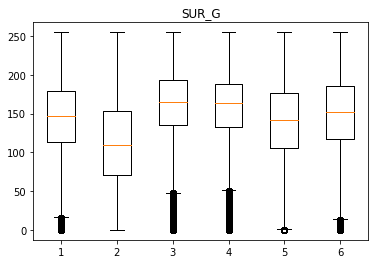

In [ ]:
#plt.boxplot([VG_1_T_SUR_IIIa,VG_1_T_SUR_IIa,VG_1_T_SUR_IVc,VG_1_T_SUR_IVd,VG_1_T_SUR_Ia,VG_1_T_SUR_Va]) 
data_sur_g = [VG_1_T_SUR_IIIa,VG_1_T_SUR_IIa,VG_1_T_SUR_IVc,VG_1_T_SUR_IVd,VG_1_T_SUR_Ia,VG_1_T_SUR_Va]
fig2, ax2 = plt.subplots()
ax2.set_title('SUR_G')
ax2.boxplot(data_sur_g)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f34f4482df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f34f44894f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f34f4482a90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f34f4489bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f34f4489eb0>,
 'means': []}

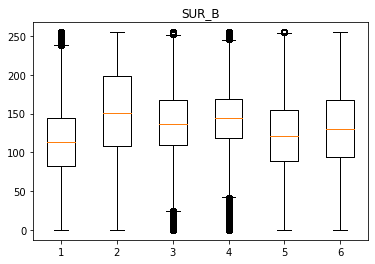

In [ ]:
#plt.boxplot([VB_1_T_SUR_IIIa,VB_1_T_SUR_IIa,VB_1_T_SUR_IVc,VB_1_T_SUR_IVd,VB_1_T_SUR_Ia,VB_1_T_SUR_Va])
data_sur_b = [VB_1_T_SUR_IIIa,VB_1_T_SUR_IIa,VB_1_T_SUR_IVc,VB_1_T_SUR_IVd,VB_1_T_SUR_Ia,VB_1_T_SUR_Va]
fig3, ax3 = plt.subplots()
ax3.set_title('SUR_B')
ax3.boxplot(data_sur_b)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7858933880>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7858933f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7858933580>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7858952910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7858952d90>,
 'means': []}

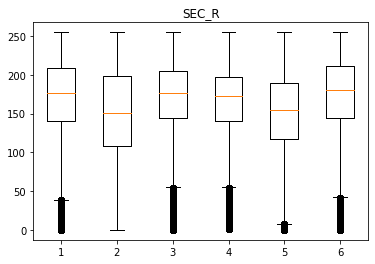

In [ ]:
#plt.boxplot([VB_1_T_SUR_IIIa,VB_1_T_SUR_IIa,VB_1_T_SUR_IVc,VB_1_T_SUR_IVd,VB_1_T_SUR_Ia,VB_1_T_SUR_Va])
data_sec_r = [VR_1_T_SEC_IIIa,VR_1_T_SEC_IIa,VR_1_T_SEC_IVc,VR_1_T_SEC_IVd,VR_1_T_SEC_Ia,VR_1_T_SEC_Va]
fig4, ax4 = plt.subplots()
ax4.set_title('SEC_R')
ax4.boxplot(data_sec_r)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78583f8ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f785840d1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78583f8760>,
 'medians': [<matplotlib.lines.Line2D at 0x7f785840d880>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f785840db80>,
 'means': []}

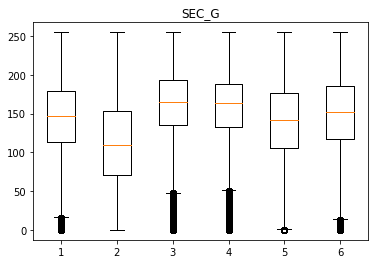

In [ ]:
#plt.boxplot([VB_1_T_SUR_IIIa,VB_1_T_SUR_IIa,VB_1_T_SUR_IVc,VB_1_T_SUR_IVd,VB_1_T_SUR_Ia,VB_1_T_SUR_Va])
data_sec_g = [VG_1_T_SEC_IIIa,VG_1_T_SEC_IIa,VG_1_T_SEC_IVc,VG_1_T_SEC_IVd,VG_1_T_SEC_Ia,VG_1_T_SEC_Va]
fig5, ax5 = plt.subplots()
ax5.set_title('SEC_G')
ax5.boxplot(data_sec_g)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7858880a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f785889c1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7858880970>,
 'medians': [<matplotlib.lines.Line2D at 0x7f785840dd00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f78583c7220>,
 'means': []}

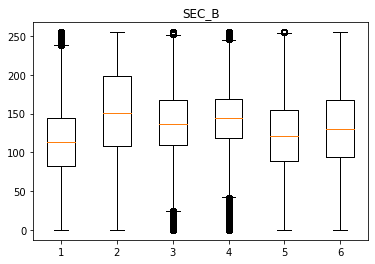

In [ ]:
#plt.boxplot([VB_1_T_SUR_IIIa,VB_1_T_SUR_IIa,VB_1_T_SUR_IVc,VB_1_T_SUR_IVd,VB_1_T_SUR_Ia,VB_1_T_SUR_Va])
data_sec_b = [VB_1_T_SEC_IIIa,VB_1_T_SEC_IIa,VB_1_T_SEC_IVc,VB_1_T_SEC_IVd,VB_1_T_SEC_Ia,VB_1_T_SEC_Va]
fig6, ax6 = plt.subplots()
ax6.set_title('SEC_B')
ax6.boxplot(data_sec_b)

### Guardado de los csv 

In [ ]:
df_fin.to_csv('SEC_Subtype_IIIa.csv')

In [ ]:
df_1.to_csv('SUR_patch_stats.csv')

In [2]:
!git init

Initialized empty Git repository in /content/.git/


In [5]:
!git commit -m "first commit"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@2c3080a4f0be.(none)')


In [6]:
!git config --global user.email "saamurai9@gmail.com"
!git config --global user.name "Alex0Alca0"

In [7]:
!git commit -m "first commit"

On branch master

Initial commit

Untracked files:
	.config/
	drive/
	sample_data/

nothing added to commit but untracked files present


In [8]:
!git branch -M main

error: refname refs/heads/master not found
fatal: Branch rename failed


In [9]:
!git remote add origin https://github.com/Alex0Alca0/Image_processing-.git

In [10]:
!git push -u origin main

error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/Alex0Alca0/Image_processing-.git'
